# Build convrnn

So we've downloaded the dataset and analyzed and visualized it. We're ready now for the next step: building the convrnn.

We first test it with a synthetic dataset: a ball that bounces.

In [1]:
#!conda install pytorch torchvision -c pytorch
#!conda install scikit-image

from time import time

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd.variable import Variable

from convlstm_pytorch import ConvLSTM, ConvLSTMCell
from synthetic_datasets import Ball
import utils
from train import train

# Give init parameters here
# b = Ball()
# Calling an instance of Ball generates a batch of images
# utils.plotting.plot_synthetic(b(sequence_length=100)[0])

I don't know how the lstm functions with its output range. Let's do some experiments to find out.

In [2]:
b = Ball(shape=(10,10), radius=(3,3))
l = ConvLSTMCell(input_size=(10,10), input_dim=1, hidden_dim=1, kernel_size=(1,1), bias=True, use_cuda=False)

# Init weights
# l.conv.weight.data.fill_(0)
# l.conv.weight.data[3,0].fill_(1)
# Bias order: (i,f,o,g) where g = C_candidate

h,c = l.init_hidden(batch_size=1)
# (b,t,c,h,w)
inp = Variable(torch.from_numpy(b(sequence_length=1).astype(np.float32)))[0]
# inp = Variable(torch.ones_like(torch.from_numpy(b(sequence_length=1).astype(np.float32))))[np.newaxis]
# inp = inp * 1

h_o, c_o = l(inp, (h,c))

im = c_o[0].data.numpy()
print("Range   {:.4f}  {:.4f}".format(im.min(), im.max()))

plt.close('all')
utils.plotting.plot_synthetic(im)

Range   0.0000  0.0054


Batch    0 loss: 1.17054 min 0.47 max 0.47 lr=[0.04] t_gen=0.23s t_fwd=0.84s t_loss=0.30s t_bwd=1.45s b/s=0.35
Batch    1 loss: 1.82706 min 0.19 max 0.78 lr=[0.04] t_gen=0.24s t_fwd=0.30s t_loss=0.30s t_bwd=1.44s b/s=0.44
Batch    2 loss: 1.13592 min 0.15 max 0.77 lr=[0.04] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch    3 loss: 0.95344 min 0.18 max 0.71 lr=[0.04] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.43s b/s=0.44
Batch    4 loss: 0.87475 min 0.17 max 0.65 lr=[0.04] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch    5 loss: 0.82131 min 0.16 max 0.60 lr=[0.04] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch    6 loss: 0.84130 min 0.15 max 0.55 lr=[0.04] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch    7 loss: 0.81930 min 0.13 max 0.53 lr=[0.04] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch    8 loss: 0.77576 min 0.12 max 0.53 lr=[0.04] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.43s b/s=0.44
B

Batch   74 loss: 0.39778 min 0.02 max 0.94 lr=[0.04] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch   75 loss: 0.41581 min 0.01 max 0.94 lr=[0.04] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch   76 loss: 0.36874 min 0.01 max 0.94 lr=[0.04] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch   77 loss: 0.39497 min 0.01 max 0.94 lr=[0.04] t_gen=0.24s t_fwd=0.26s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch   78 loss: 0.38003 min 0.01 max 0.94 lr=[0.04] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch   79 loss: 0.36018 min 0.01 max 0.95 lr=[0.04] t_gen=0.23s t_fwd=0.27s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch   80 loss: 0.34910 min 0.01 max 0.95 lr=[0.04] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch   81 loss: 0.35382 min 0.01 max 0.95 lr=[0.04] t_gen=0.24s t_fwd=0.27s t_loss=0.32s t_bwd=1.45s b/s=0.44
Batch   82 loss: 0.40339 min 0.01 max 0.95 lr=[0.04] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.45s b/s=0.44
B

Batch  148 loss: 0.29012 min 0.01 max 0.98 lr=[0.04] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  149 loss: 0.26799 min 0.01 max 0.98 lr=[0.04] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  150 loss: 0.28223 min 0.01 max 0.98 lr=[0.02] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  151 loss: 0.29047 min 0.01 max 0.98 lr=[0.02] t_gen=0.23s t_fwd=0.27s t_loss=0.32s t_bwd=1.44s b/s=0.44
Batch  152 loss: 0.28726 min 0.01 max 0.98 lr=[0.02] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  153 loss: 0.30479 min 0.01 max 0.98 lr=[0.02] t_gen=0.23s t_fwd=0.27s t_loss=0.32s t_bwd=1.45s b/s=0.44
Batch  154 loss: 0.26354 min 0.01 max 0.98 lr=[0.02] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  155 loss: 0.28497 min 0.01 max 0.98 lr=[0.02] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  156 loss: 0.25797 min 0.01 max 0.98 lr=[0.02] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
B

Batch  222 loss: 0.24954 min 0.01 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.43s b/s=0.44
Batch  223 loss: 0.25858 min 0.01 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  224 loss: 0.23381 min 0.01 max 0.99 lr=[0.02] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  225 loss: 0.25440 min 0.01 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.43s b/s=0.44
Batch  226 loss: 0.25669 min 0.01 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  227 loss: 0.24472 min 0.01 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  228 loss: 0.23524 min 0.01 max 0.99 lr=[0.02] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  229 loss: 0.24295 min 0.01 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  230 loss: 0.24146 min 0.01 max 0.99 lr=[0.02] t_gen=0.24s t_fwd=0.27s t_loss=0.32s t_bwd=1.45s b/s=0.44
B

Batch  296 loss: 0.22154 min 0.00 max 0.99 lr=[0.02] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch  297 loss: 0.22749 min 0.00 max 0.99 lr=[0.02] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  298 loss: 0.21357 min 0.00 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  299 loss: 0.21397 min 0.00 max 0.99 lr=[0.02] t_gen=0.23s t_fwd=0.27s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch  300 loss: 0.21305 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  301 loss: 0.21860 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch  302 loss: 0.23189 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  303 loss: 0.21743 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.43s b/s=0.44
Batch  304 loss: 0.20649 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
B

Batch  370 loss: 0.21728 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  371 loss: 0.20558 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.27s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  372 loss: 0.20909 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  373 loss: 0.21661 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  374 loss: 0.20988 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch  375 loss: 0.21364 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  376 loss: 0.21716 min 0.00 max 0.99 lr=[0.01] t_gen=0.25s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  377 loss: 0.20224 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  378 loss: 0.21451 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.30s t_loss=0.31s t_bwd=1.44s b/s=0.44
B

Batch  444 loss: 0.17811 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  445 loss: 0.19354 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  446 loss: 0.19606 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  447 loss: 0.20457 min 0.00 max 0.99 lr=[0.01] t_gen=0.23s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  448 loss: 0.19011 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.28s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  449 loss: 0.18796 min 0.00 max 0.99 lr=[0.01] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.44
Batch  450 loss: 0.19198 min 0.00 max 0.99 lr=[0.005] t_gen=0.23s t_fwd=0.28s t_loss=0.31s t_bwd=1.45s b/s=0.44
Batch  451 loss: 0.18666 min 0.00 max 0.99 lr=[0.005] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.43s b/s=0.44
Batch  452 loss: 0.17671 min 0.00 max 0.99 lr=[0.005] t_gen=0.24s t_fwd=0.29s t_loss=0.31s t_bwd=1.44s b/s=0.4

Batch  518 loss: 0.17148 min 0.00 max 1.00 lr=[0.005] t_gen=0.25s t_fwd=0.47s t_loss=0.48s t_bwd=2.91s b/s=0.24
Batch  519 loss: 0.19172 min 0.00 max 1.00 lr=[0.005] t_gen=0.25s t_fwd=0.43s t_loss=0.54s t_bwd=2.90s b/s=0.24
Batch  520 loss: 0.17812 min 0.00 max 1.00 lr=[0.005] t_gen=0.24s t_fwd=0.37s t_loss=0.57s t_bwd=2.93s b/s=0.24
Batch  521 loss: 0.18635 min 0.00 max 1.00 lr=[0.005] t_gen=0.25s t_fwd=0.32s t_loss=0.59s t_bwd=2.93s b/s=0.24
Batch  522 loss: 0.17743 min 0.00 max 1.00 lr=[0.005] t_gen=0.25s t_fwd=0.31s t_loss=0.59s t_bwd=2.92s b/s=0.25
Batch  523 loss: 0.19149 min 0.00 max 1.00 lr=[0.005] t_gen=0.24s t_fwd=0.33s t_loss=0.63s t_bwd=2.94s b/s=0.24
Batch  524 loss: 0.17779 min 0.00 max 1.00 lr=[0.005] t_gen=0.25s t_fwd=0.32s t_loss=0.69s t_bwd=2.86s b/s=0.24
Batch  525 loss: 0.18363 min 0.00 max 1.00 lr=[0.005] t_gen=0.25s t_fwd=0.36s t_loss=0.71s t_bwd=2.89s b/s=0.24
Batch  526 loss: 0.18139 min 0.00 max 1.00 lr=[0.005] t_gen=0.25s t_fwd=0.43s t_loss=0.69s t_bwd=2.89s b

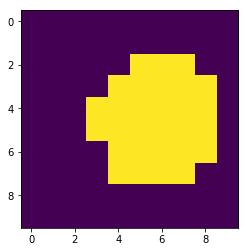

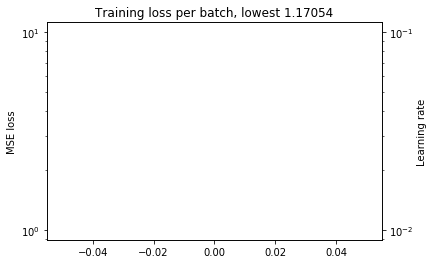

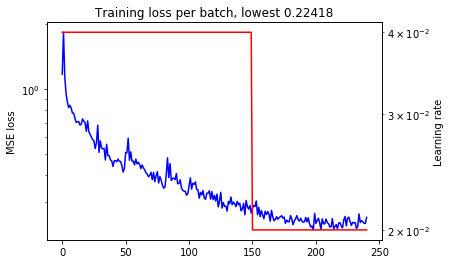

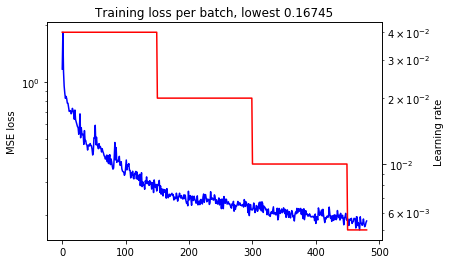

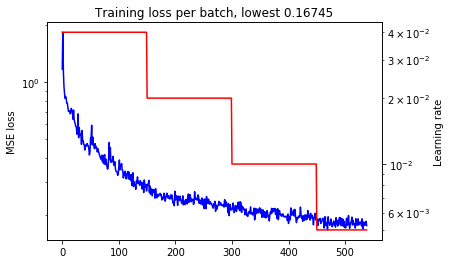

In [3]:
a = {
    "use_cuda": True,
    
    # Ball params
    "input_size": [30,30],
    "radius": [8,8],
    "velocity": 2,
    "gravity": 0,
    "bounce": True,
    
    # Network params
    "input_dim": 1,
    "hidden_dim": [32,16,16],
    "kernel_size": [5,5],
    
    # Meta params
    "learning_rate": 0.04,
    "n_batches": 1200,
    "batch_size": 200,
    "inputs_seq_len": 4,
    "outputs_seq_len": 5
}

model, losses, learning_rates = train(a, save_dir="test")


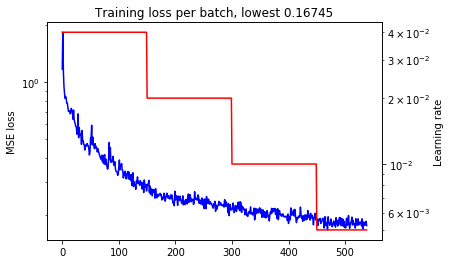

In [4]:
utils.plotting.plot_loss(losses, learning_rates=learning_rates)

In [7]:
b = Ball(shape=a['input_size'], radius=a['radius'], velocity=a['velocity'], gravity=a['gravity'], bounce=a['bounce'])

inputs = b(batch_size=1, sequence_length=3)
inputs_var = Variable(torch.from_numpy(inputs)).cuda()

preds = model(inputs_var, n_targets=3)

inp = [inputs[0,timestep,0] for timestep in range(inputs.shape[1])]
p = [v[0,0].data for v in preds]

utils.plotting.plot_synthetic(inp+p, interval=400)